# a1q4 Lim, Dongjoon 260587899

In [1]:
import operator
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Declaire global variables.
meanMSE = 0
wList=[]

#Let's get our data first and check how it looks like
crime_data = pd.read_csv('communities.data', delimiter = ',', header=None, na_values = '?')
crime_data.head()
#Trim unnecessary columns
crime_data = crime_data.iloc[:,5:]
crime_data = crime_data.apply(pd.to_numeric, errors='coerce')
crime_mean = crime_data  # save crime_data for later use
#crime_median = crime_data  # save crime_data for later use
#crime_data.info()


### Now let's fill in missing entries with column means

In [2]:
for column in crime_mean:
    crime_mean[column] = crime_mean[column].fillna((crime_mean[column].mean()))
print(crime_mean)

       5     6     7     8     9     10    11    12    13    14   ...    118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...   0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...   0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...   0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...   0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...   0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...   0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10

## Q4.1.(a) : We filled the missing values with the mean of each column. This can be a reasonable way if the data is not skewed but also very dangerous to use when the data is skewed.
## Q4.1.(b) : When data is skewed, median can better represent the missing value. Or if the missing value is category, we could also choose to fill the missing values with most frequent value.
## Q4.1.(c) : Using median to fill NaN is better for our data as out data is skewed to large values so the median better represent the missing values.
## Q4.1.(d) : The data are above and below

### Now we will use median to fill in the missing data.

In [3]:
crime_median = pd.read_csv('communities.data', delimiter = ',', header=None, na_values = '?')
#print(crime_median)
crime_median = crime_data.apply(pd.to_numeric, errors='coerce')
for column in crime_median:
    crime_median[column].fillna((crime_median[column].median()), inplace=True)
print(crime_median)

       5     6     7     8     9     10    11    12    13    14   ...    118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...   0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...   0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...   0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...   0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...   0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...   0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10

### Now we will do 5-Cross validation. Starting with 20-80 split.

In [4]:
# First, split samples into 5 different train sets and test sets

# Drop unnecessary data.
#crime_mean = crime_mean.iloc[:,5:]
train1=crime_mean.sample(frac=0.8,random_state=165)
test1=crime_mean.drop(train1.index)

train2=crime_mean.sample(frac=0.8,random_state=140)
test2=crime_mean.drop(train2.index)

train3=crime_mean.sample(frac=0.8,random_state=169)
test3=crime_mean.drop(train3.index)

train4=crime_mean.sample(frac=0.8,random_state=54)
test4=crime_mean.drop(train2.index)

train5=crime_mean.sample(frac=0.8,random_state=117)
test5=crime_mean.drop(train5.index)

train1.to_csv('CandC−train<1>.csv', index = False)
train2.to_csv('CandC−train<2>.csv', index = False)
train3.to_csv('CandC−train<3>.csv', index = False)
train4.to_csv('CandC−train<4>.csv', index = False)
train5.to_csv('CandC−train<5>.csv', index = False)

test1.to_csv('CandC−test<1>.csv', index = False)
test2.to_csv('CandC−test<2>.csv', index = False)
test3.to_csv('CandC−test<3>.csv', index = False)
test4.to_csv('CandC−test<4>.csv', index = False)
test5.to_csv('CandC−test<5>.csv', index = False)

#print(crime_mean)

### Define functions and train

In [5]:
# Define function for mse
def mse(y,y_hat):
    return sum([(y_hat[i] - y[i]) ** 2 for i in range(len(y_hat))])/len(y_hat)

def getWeight(x, y):
    w = np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)
    #print (x)
    return w
def getWeightl2(x, y):
    w= np.linalg.inv((x.T).dot(x)+l*np.eye(np.shape(x)[1])).dot(x.T).dot(y)
    return w
def y_hat(x, weight):
    return np.array([sum([weight[j] * x[i] ** j for j in range(len(weight))]) for i in range(len(x))]).T
#=========================================================================================================
# Now calculate the multivariate regression. Similar to what I have done in previous questions.

## Q4.2 Answer reported below!

In [6]:
minMSE = float('inf') # To find the minimum MSE among 5 split sets.
index = 0 # To find the index of minimum MSE
for i in range(1,6):
    totalmse = 0
    train = pd.read_csv("CandC−train<{0}>.csv".format(i))
    #train = train[:,5:]
    test = pd.read_csv("CandC−test<{0}>.csv".format(i))
    #test = test[:,5:]
    """y = train[train.columns[-1]]
    x = train.drop(train.columns[len(train.columns)-1], axis=1)

    X = np.matrix(x)

    Y = np.matrix(y)
    Y = np.transpose(Y)

    # Finally calculate the coefficient matrix
    w = getWeight(X,Y)"""
    M = np.array(train.as_matrix())
    x= M[:,:-1]
    y = M[:,-1]
    # Train using train data and get the weight list.
    w = getWeight(x,y)

    M2 = np.array(test.as_matrix())
    x_test = M2[:,:-1]
    y_test = M2[:,-1]
    #print(np.shape(y_test))
    
    for j in range (np.shape(x_test)[0]):
        totalmse = totalmse+ mse(y_test, y_hat(x_test[j],w))
        #print(mse(y_test, y_hat(x_test[j],w)))
        
    meanMSE+=totalmse
    wList.append(w)
    print("MSE for CandC−train<{0}>: {1}".format(i,totalmse))
    print("parameters w for this set is: ", w)
    if totalmse < minMSE:
        minMSE = totalmse
        index = i

meanMSE = meanMSE/5
print("Average of 5 MSEs: {0}".format(meanMSE))
print("The minimum MSE among these 5 was "+str(minMSE)+" at CandC-train<"+str(index)+">")

/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


MSE for CandC−train<1>: 79.22176619402626
parameters w for this set is:  [-9.55076973e-02 -1.66429465e-02  2.82442377e-01  2.38118704e-02
  1.02352803e-02  6.77326341e-02  1.31864714e-01 -1.49702526e-01
 -1.64983758e-01  1.16192630e-01 -4.91131258e-02  4.43191328e-02
 -2.09888396e-01 -1.16948836e-01  5.16069637e-02 -1.55846343e-01
  1.03261305e-01  4.62345722e-02 -9.69825789e-02  3.40959068e-01
  2.23314960e-01 -4.74464822e-01 -3.73904653e-02 -2.92003257e-02
  3.45672379e-02  4.77455363e-02 -8.56338128e-03 -1.24158992e-02
 -1.19002966e-01 -1.22164994e-01  1.13099670e-01  5.47532501e-02
  1.46314410e-02  2.62462227e-01 -9.84816310e-02 -2.71155182e-02
  1.11027851e-01  1.31864792e-01  3.92352525e-01  2.15243653e-01
  3.73115465e-02 -3.84097314e-01 -1.47421137e-02  1.01789815e-01
 -3.05646652e-01 -7.24730416e-02 -2.31019764e-02  8.66323732e-02
 -2.29436521e-01 -2.72572293e-02  8.39656524e-02 -1.68644093e-01
  4.32161874e-03  3.99160024e-02 -1.13762310e-01  7.39335766e-02
  2.89348893e-02 

MSE for CandC−train<5>: 58.41532419643595
parameters w for this set is:  [-2.34779534e-02 -4.05841286e-02  2.09450546e-01 -6.60548876e-03
 -5.19248020e-02  3.56059144e-02  1.28237957e-01 -3.03449786e-01
 -1.04287987e-01 -1.24860598e-02 -1.48105937e-01  4.43110848e-02
 -2.54659866e-01 -1.79119725e-01  2.37617819e-02 -1.87193305e-01
  1.31700750e-01  8.16511151e-02 -9.89950956e-02  3.27686376e-01
  2.18929723e-01 -4.31359481e-01 -5.13698694e-02 -2.51628661e-02
  1.13106109e-02  4.34403209e-02  4.67298007e-02 -6.15214915e-02
 -1.95655312e-01 -1.19755205e-01  4.93476379e-02  8.79955538e-02
 -2.66584923e-03  2.41045266e-01 -4.38768347e-02 -2.78426846e-02
  4.62752603e-02  6.71210410e-02  5.97227174e-01  2.32215509e-01
  3.89241505e-01 -9.56158878e-01 -2.88645205e-02  1.40505646e-01
 -4.52985373e-01 -5.78332485e-03 -5.47565209e-02  5.21890016e-02
 -1.67304645e-01 -3.14866405e-02  7.92548683e-02 -1.05032918e-01
  4.78727716e-02  1.23086047e-02 -5.22135457e-02  4.96782536e-02
 -2.93834189e-02 

### Now we will do L2 Regularization(Ridge Regression) on this data

In [7]:
minMSE = float('inf')
lambdaList = np.arange(0,1,0.1)
best_l = 0
list = []
for l in lambdaList:
    for i in range(1,6):
        train = pd.read_csv("CandC−train<{0}>.csv".format(i))
        #train = train[:,5:]
        test = pd.read_csv("CandC−test<{0}>.csv".format(i))
        #test = test[:,5:]
        tmp = np.ones((1595,1))
        tmp2 = np.ones((399,1))
        #y = train[train.columns[-1]]
        #x = train.drop(train.columns[len(train.columns)-1], axis=1)

        #X = np.matrix(x)

        #Y = np.matrix(y)
        #Y = np.transpose(Y)
        #w = getWeight(X,Y)"""
        M = np.array(train.as_matrix())
        x= M[:,:-1]
        y = M[:,-1]
        x = np.append(tmp,x,axis=1)
        
        # Get the list of parameters
        w = getWeightl2(x, y)

        M2 = np.array(test.as_matrix())
        x_test = M2[:,:-1]
        y_test = M2[:,-1]
        #print(np.shape(x_test)[0])
        x_test = np.append(tmp2,x_test,axis=1)

        totalmse = 0
        for j in range (399):
            totalmse = totalmse+ mse(y_test, y_hat(x_test[j],w))
            #print(mse(y_test, y_hat(x_test[j],w)))

        meanMSE+=totalmse
        wList.append(w)
        #print("MSE for CandC−train<{0}>: {1}".format(i,totalmse))
        #print("parameters w for this set is: ", w)
    mseMean = 0
    mseMean = mseMean +totalmse
    mseMean = mseMean/5
    
    list.append(mseMean)
    if mseMean < minMSE:
        minMSE=mseMean
        best_lambda=l
    print("Average MSE when lambda={0}: {1}".format(l, mseMean))
print("The best lambda value found is {0} with the MSE of {1}".format(best_lambda, minMSE))
    

/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Average MSE when lambda=0.0: 5.560132968208389
Average MSE when lambda=0.1: 5.4533800782132245
Average MSE when lambda=0.2: 5.146251603750207
Average MSE when lambda=0.30000000000000004: 5.182249734587839
Average MSE when lambda=0.4: 5.351294561640451
Average MSE when lambda=0.5: 5.561603040874866
Average MSE when lambda=0.6000000000000001: 5.7768285141468985
Average MSE when lambda=0.7000000000000001: 5.982855927263851
Average MSE when lambda=0.8: 6.174714851673165
Average MSE when lambda=0.9: 6.351287771798345
The best lambda value found is 0.2 with the MSE of 5.146251603750207


Text(0.5,1,'MSE change according to Lambda value from 0 to 1')

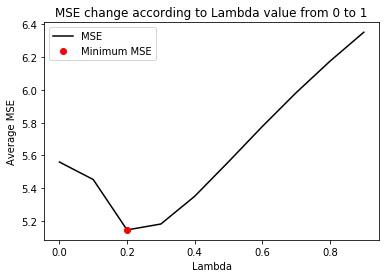

In [8]:
plt.plot(lambdaList, list, "k")
plt.plot(best_lambda, minMSE,'ro')
plt.xlabel('Lambda')
plt.ylabel('Average MSE')
plt.legend(['MSE','Minimum MSE'])
plt.title('MSE change according to Lambda value from 0 to 1')


## Now let's try to reduce features

In [9]:
#Trim out feature where w is close to 0.
features = (np.where(abs(w)< 0.025))
print(features)
#==================================================
minMSE = float('inf')
lambdaList = np.arange(0,1,0.1)
best_l = 0
list = []
for l in lambdaList:
    for i in range(1,6):
        train = pd.read_csv("CandC−train<{0}>.csv".format(i))
        #train = train[:,5:]
        test = pd.read_csv("CandC−test<{0}>.csv".format(i))
        #test = test[:,5:]
        """y = train[train.columns[-1]]
        x = train.drop(train.columns[len(train.columns)-1], axis=1)

        X = np.matrix(x)

        Y = np.matrix(y)
        Y = np.transpose(Y)
        w = getWeight(X,Y)"""
        tmp = np.ones((1595,1))
        tmp2 = np.ones((399,1))
        M = np.array(train.as_matrix())
        x= M[:,:-1]
        x = np.append(tmp,x,axis=1)
        
        y = M[:,-1]
        #Remove features
        for feature in features:           
            x = np.delete(x,i,axis=1)

        # Train using train data and get the weight list.
        w = getWeightl2(x, y)

        M2 = np.array(test.as_matrix())
        x_test = M2[:,:-1]
        y_test = M2[:,-1]
        
        
        x_test = np.append(tmp2,x_test,axis=1)
        for feature in features:           
            x_test = np.delete(x_test,i,axis=1)
        totalmse = 0
        for j in range (399):
            totalmse = totalmse+ mse(y_test, y_hat(x_test[j],w))
            #print(mse(y_test, y_hat(x_test[j],w)))

        meanMSE+=totalmse
        wList.append(w)
        #print("MSE for CandC−train<{0}>: {1}".format(i,totalmse))
        #print("parameters w for this set is: ", w)
    mseMean = 0
    mseMean = mseMean +totalmse
    mseMean = mseMean/5
    
    list.append(mseMean)
    if mseMean < minMSE:
        minMSE=mseMean
        best_lambda=l
    print("Average MSE when lambda={0}: {1}".format(l, mseMean))
print("The best lambda value found is {0} with the MSE of {1}".format(best_lambda, minMSE))

(array([  2,   4,  13,  15,  21,  24,  25,  33,  36,  46,  48,  54,  55,
        61,  67,  71,  77,  79,  81,  84,  93,  94,  95,  98, 104, 106,
       108, 110, 112, 113, 119]),)


/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Average MSE when lambda=0.0: 7.73366036164447
Average MSE when lambda=0.1: 5.36288760216718
Average MSE when lambda=0.2: 5.314274780774088
Average MSE when lambda=0.30000000000000004: 5.473156438041837
Average MSE when lambda=0.4: 5.703352503579643
Average MSE when lambda=0.5: 5.944474975487852
Average MSE when lambda=0.6000000000000001: 6.17452837643013
Average MSE when lambda=0.7000000000000001: 6.386538662450201
Average MSE when lambda=0.8: 6.579334884773338
Average MSE when lambda=0.9: 6.753927185470401
The best lambda value found is 0.2 with the MSE of 5.314274780774088


Text(0.5,1,'Features selected MSE change according to Lambda value from 0 to 1')

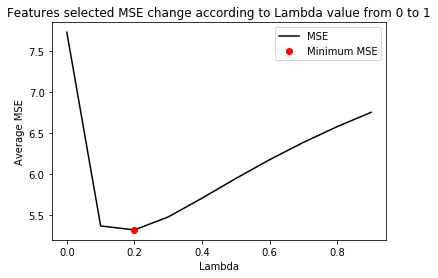

In [10]:
plt.plot(lambdaList, list, "k")
plt.plot(best_lambda, minMSE,'ro')
plt.xlabel('Lambda')
plt.ylabel('Average MSE')
plt.legend(['MSE','Minimum MSE'])
plt.title('Features selected MSE change according to Lambda value from 0 to 1')